# Features from application dataset

This notebook extracts manually created features from the application training and testing datasets and displays the distribution of both categorical and numerical features. The application dataset is the main dataset in Kaggle's Home Credit default risk competition and includes the target data: default (target = 1) or no default (target = 0) on the loan. The target data is only available for the training data.

In [1]:
# Importing main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
%matplotlib inline
pd.set_option('display.max_columns', 2000)

# Defining standard plot options
sns.set(font_scale=1.4)
sns.set_style("white")

# Reverting to old color palette
pal = sns.color_palette("deep")
pal = pal.as_hex()
pal[1], pal[2], pal[3] = pal[2], pal[3], pal[1]
sns.set_palette(pal)

In [2]:
# Reading data files into csv format
application_train = pd.read_csv("./data/application_train.csv")
application_test = pd.read_csv("./data/application_test.csv")
homecredit_columns_description = pd.read_csv("./data/HomeCredit_columns_description.csv", encoding="ISO-8859-1")

In [3]:
# Joining the training and testing data
application_train["train"] = 1
application_test["train"] = 0
application = pd.concat([application_train, application_test])

application.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0      24700.5    406597.5         351000.0          202500.0   
1      35698.5   1293502.5        1129500.0          270000.0   
2       6750.0    135000.0         135000.0           67500.0   
3      29686.5    312682.5         297000.0          135000.0   
4      21865.5    513000.0         513000.0          121500.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  APARTMENTS_AVG  \
0                         0.0                         1.0          0.0247   
1                         0.0                         0.0          0.0959   
2                         0.0                         0.0             NaN   
3                         NaN                         NaN             NaN   
4                         0.0                         0.0             NaN   

   APARTMENTS_MEDI  APARTMENTS_MODE  BASEMENTAREA_AVG  BASEMENTAREA_MEDI  \
0           0.0250           0.0252            0.0369             0.0369   
1           0.0968           0.0924            0.0529             0.0529   
2              NaN              NaN               NaN                NaN   
3              NaN              NaN               NaN                NaN   
4              NaN              NaN               NaN                NaN   

   BASEMENTAREA_MODE  CNT_CHILDREN  CNT_FAM_MEMBERS CODE_GENDER  \
0             0.0383             0              1.0           M   
1             0.0538             0              2.0           F   
2                NaN             0              1.0           M   
3                NaN             0              2.0           F   
4                NaN             0              1.0           M   

   COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  DAYS_BIRTH  \
0          0.0143           0.0144           0.0144       -9461   
1          0.0605           0.0608           0.0497      -16765   
2             NaN              NaN              NaN      -19046   
3             NaN              NaN              NaN      -19005   
4             NaN              NaN              NaN      -19932   

   DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  \
0           -637            -2120                 -1134.0            -3648.0   
1          -1188             -291                  -828.0            -1186.0   
2           -225            -2531                  -815.0            -4260.0   
3          -3039            -2437                  -617.0            -9833.0   
4          -3038            -3458                 -1106.0            -4311.0   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  ELEVATORS_AVG  \
0                       2.0                       2.0           0.00   
1                       0.0                       0.0           0.08   
2                       0.0                       0.0            NaN   
3                       0.0                       0.0            NaN   
4                       0.0                       0.0            NaN   

   ELEVATORS_MEDI  ELEVATORS_MODE EMERGENCYSTATE_MODE  ENTRANCES_AVG  \
0            0.00          0.0000                  No         0.0690   
1            0.08          0.0806                  No         0.0345   
2             NaN             NaN       

In [4]:
# Description of columns in application dataset
description_application = homecredit_columns_description[homecredit_columns_description["Table"] == "application_{train|test}.csv"]
for index, row in description_application.iterrows():
    print(row["Row"], row["Description"])

# Correction of description dataframe
homecredit_columns_description.loc[homecredit_columns_description["Row"] == "FLAG_EMP_PHONE", "Description"] = "Did client provide employer phone (1=YES, 0=NO)"
homecredit_columns_description.loc[homecredit_columns_description["Row"] == "FLAG_WORK_PHONE", "Description"] = "Did client provide work phone (1=YES, 0=NO)"

SK_ID_CURR ID of loan in our sample
TARGET Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
NAME_CONTRACT_TYPE Identification if loan is cash or revolving
CODE_GENDER Gender of the client
FLAG_OWN_CAR Flag if the client owns a car
FLAG_OWN_REALTY Flag if client owns a house or flat
CNT_CHILDREN Number of children the client has
AMT_INCOME_TOTAL Income of the client
AMT_CREDIT Credit amount of the loan
AMT_ANNUITY Loan annuity
AMT_GOODS_PRICE For consumer loans it is the price of the goods for which the loan is given
NAME_TYPE_SUITE Who was accompanying client when he was applying for the loan
NAME_INCOME_TYPE Clients income type (businessman, working, maternity leave,?)
NAME_EDUCATION_TYPE Level of highest education the client achieved
NAME_FAMILY_STATUS Family status of the client
NAME_HOUSING_TYPE What is the housing situation of the client (renti

In [5]:
# Function to display description of selected feature
def add_description(table, row, description):
    list_description = [np.NaN, table, row, description, np.NaN]
    homecredit_columns_description.loc[len(homecredit_columns_description)] = list_description
    return homecredit_columns_description

In [6]:
# Replacement of very infrequent observations for discrete features
application.loc[application["CNT_CHILDREN"] >= 5, "CNT_CHILDREN"] = 5
application.loc[application["CODE_GENDER"] == "XNA", "CODE_GENDER"] = application["CODE_GENDER"].mode()
application.loc[application["NAME_FAMILY_STATUS"] == "Unknown", "NAME_FAMILY_STATUS"] = application["NAME_FAMILY_STATUS"].mode()
application.loc[application["CNT_FAM_MEMBERS"] >= 6, "CNT_FAM_MEMBERS"] = 6
application.loc[application["OBS_30_CNT_SOCIAL_CIRCLE"] >= 15, "OBS_30_CNT_SOCIAL_CIRCLE"] = 15
application.loc[application["DEF_30_CNT_SOCIAL_CIRCLE"] >= 5, "DEF_30_CNT_SOCIAL_CIRCLE"] = 5
application.loc[application["OBS_60_CNT_SOCIAL_CIRCLE"] >= 15, "OBS_60_CNT_SOCIAL_CIRCLE"] = 15
application.loc[application["DEF_60_CNT_SOCIAL_CIRCLE"] >= 5, "DEF_60_CNT_SOCIAL_CIRCLE"] = 5
application.loc[application["AMT_REQ_CREDIT_BUREAU_HOUR"] >= 2, "AMT_REQ_CREDIT_BUREAU_HOUR"] = 2
application.loc[application["AMT_REQ_CREDIT_BUREAU_DAY"] >= 3, "AMT_REQ_CREDIT_BUREAU_DAY"] = 3
application.loc[application["AMT_REQ_CREDIT_BUREAU_WEEK"] >= 4, "AMT_REQ_CREDIT_BUREAU_WEEK"] = 4
application.loc[application["AMT_REQ_CREDIT_BUREAU_MON"] >= 10, "AMT_REQ_CREDIT_BUREAU_MON"] = 10
application.loc[application["AMT_REQ_CREDIT_BUREAU_QRT"] >= 5, "AMT_REQ_CREDIT_BUREAU_QRT"] = 5
application.loc[application["AMT_REQ_CREDIT_BUREAU_YEAR"] >= 10, "AMT_REQ_CREDIT_BUREAU_YEAR"] = 10

# Replacement of absurd observations for continuous features
application.loc[application["AMT_INCOME_TOTAL"] >= 5000000, "AMT_INCOME_TOTAL"] = 5000000


In [7]:
# Creation of new manual features for application dataframe

# Credit to total income ratio
application["CREDIT_INCOME_RATIO"] = application["AMT_CREDIT"]/application["AMT_INCOME_TOTAL"]
add_description("application_{train|test}.csv", "CREDIT_INCOME_RATIO", "Credit to total income ratio")

# Annuity to total income ratio
application["ANNUITY_INCOME_RATIO"] = application["AMT_ANNUITY"]/application["AMT_INCOME_TOTAL"]
add_description("application_{train|test}.csv", "ANNUITY_INCOME_RATIO", "Annuity to total income ratio")

# Credit to annuity ratio (indicative of credit duration)
application["CREDIT_ANNUITY_RATIO"] = application["AMT_CREDIT"]/application["AMT_ANNUITY"]
add_description("application_{train|test}.csv", "CREDIT_ANNUITY_RATIO", "Credit to annuity ratio (indicative of credit duration)")

# Estimated age at the end of the credit
application["AGE_END_CREDIT"] = -application["DAYS_BIRTH"]/365.25 + application["CREDIT_ANNUITY_RATIO"]
add_description("application_{train|test}.csv", "AGE_END_CREDIT", "Estimated age at the end of the credit")

# Personal contribution for purchasing goods (good price minus credit)
application["PERSONAL_CONTRIBUTION"] = (application["AMT_GOODS_PRICE"] - application["AMT_CREDIT"])
add_description("application_{train|test}.csv", "PERSONAL_CONTRIBUTION", "Personal contribution for purchasing goods (good price minus credit)")

# Average credit score
application["AVG_EXT_SOURCE"] = application[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
add_description("application_{train|test}.csv", "AVG_EXT_SOURCE", "Average credit score")

# Standard deviation between credit scores
application['NEW_SCORES_STD'] = application[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
add_description("application_{train|test}.csv", "NEW_SCORES_STD", "Standard deviation between credit scores")

# Fraction of life employed
application['EMPLOY_BIRTH_RATIO'] = application['DAYS_EMPLOYED'] / application['DAYS_BIRTH']
add_description("application_{train|test}.csv", "EMPLOY_BIRTH_RATIO", "Fraction of life employed")

# Fraction of life with current car
application['CAR_BIRTH_RATIO'] = application['OWN_CAR_AGE'] / application['DAYS_BIRTH']
add_description("application_{train|test}.csv", "CAR_BIRTH_RATIO", "Fraction of life with current car")

# Fraction of life with current phone
application['PHONE_BIRTH_RATIO'] = application['DAYS_LAST_PHONE_CHANGE'] / application['DAYS_BIRTH']
add_description("application_{train|test}.csv", "PHONE_BIRTH_RATIO", "Fraction of life with current phone");


In [8]:
# Saving application dataframe into csv file
application.to_csv("./data/application.csv",index=False)

In [9]:
# Saving homecredit_columns_description dataframe into csv file
homecredit_columns_description.to_csv("./data/homecredit_columns_description.csv",index=False)

In [10]:
# Loading application dataframe from csv file (if file aleady created)
# application = pd.read_csv("./data/application.csv")

In [11]:
# Reading data files into csv format (if file aleady created)
# homecredit_columns_description = pd.read_csv("./data/homecredit_columns_description.csv", encoding="ISO-8859-1")

In [12]:
# Listing discrete and continuous variables for displaying purposes

discrete_features = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN",\
                     "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", \
                     "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", \
                     "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", \
                     "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",\
                     "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION",\
                     "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",\
                     "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", \
                     "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "OBS_30_CNT_SOCIAL_CIRCLE", \
                     "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", \
                     "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", \
                     "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", \
                     "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", \
                     "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", \
                     "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", \
                     "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", \
                     "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", \
                     "AMT_REQ_CREDIT_BUREAU_YEAR"]

continuous_features = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", \
                       "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", \
                       "DAYS_ID_PUBLISH", "OWN_CAR_AGE", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", \
                       "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", \
                       "COMMONAREA_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", \
                       "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG","TOTALAREA_MODE", "ELEVATORS_AVG",\
                       "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "DAYS_LAST_PHONE_CHANGE",\
                       "CREDIT_INCOME_RATIO", "ANNUITY_INCOME_RATIO", "CREDIT_ANNUITY_RATIO", "AGE_END_CREDIT", \
                       "AVG_EXT_SOURCE"]

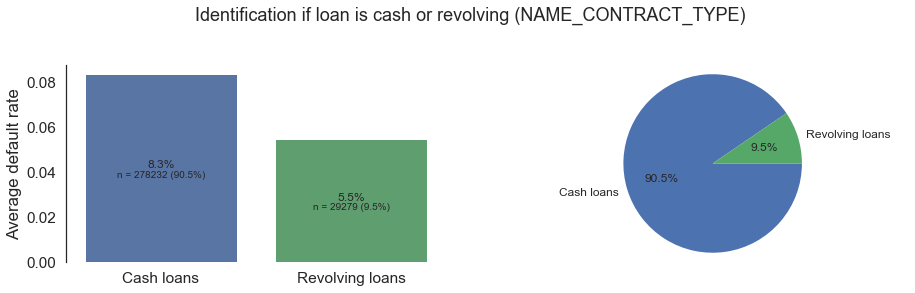

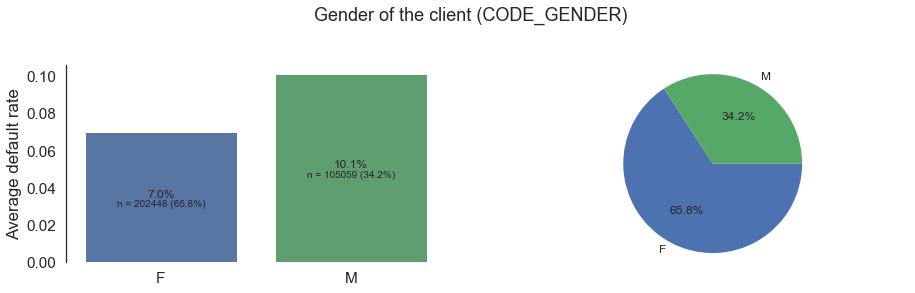

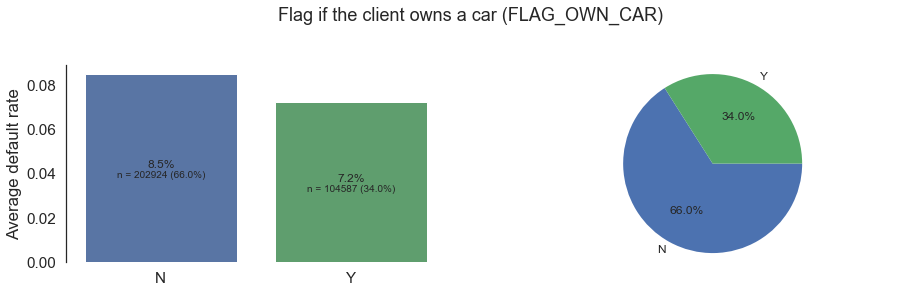

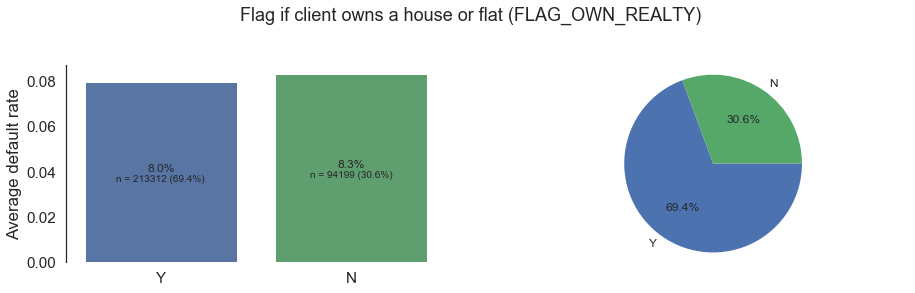

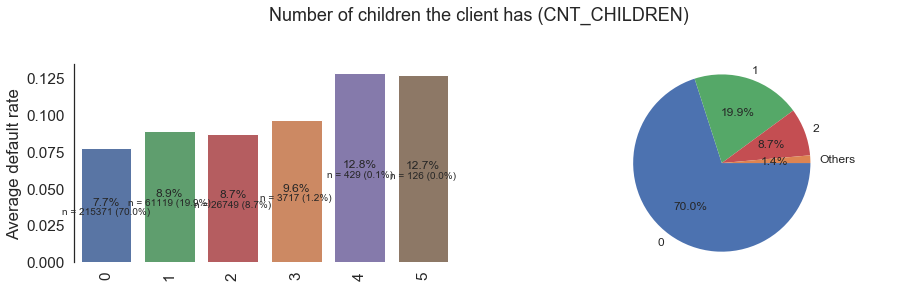

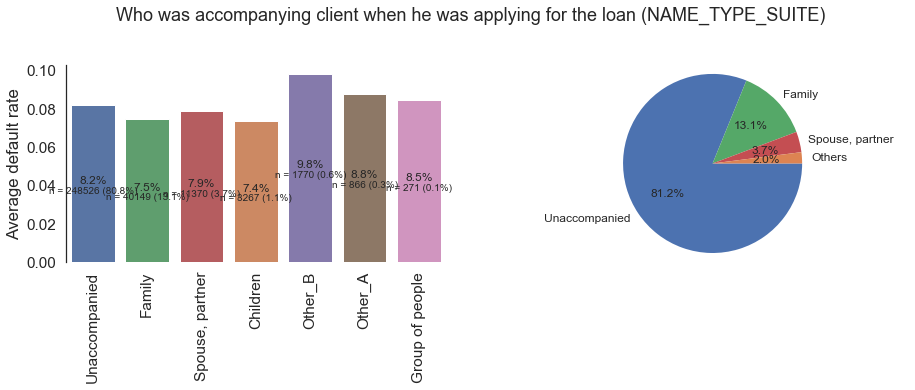

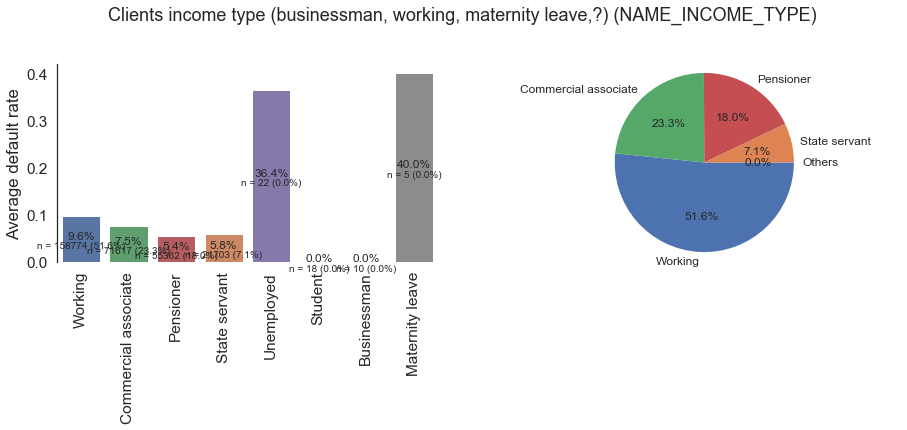

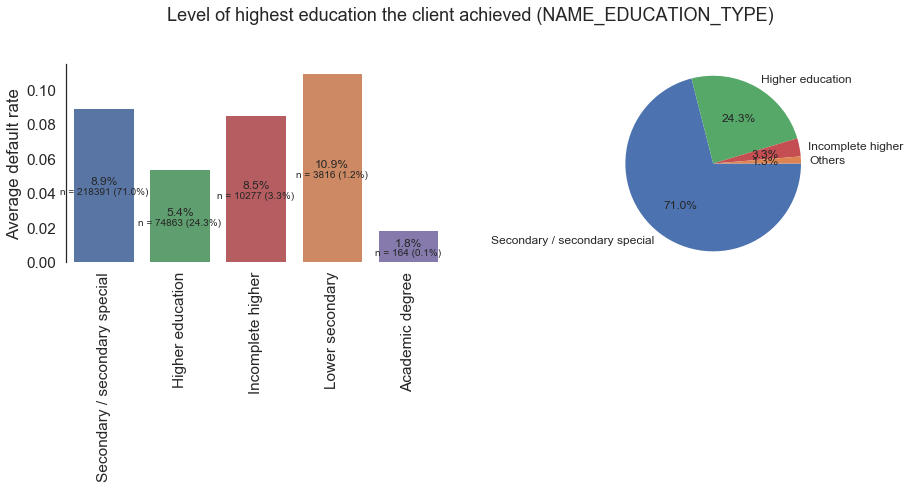

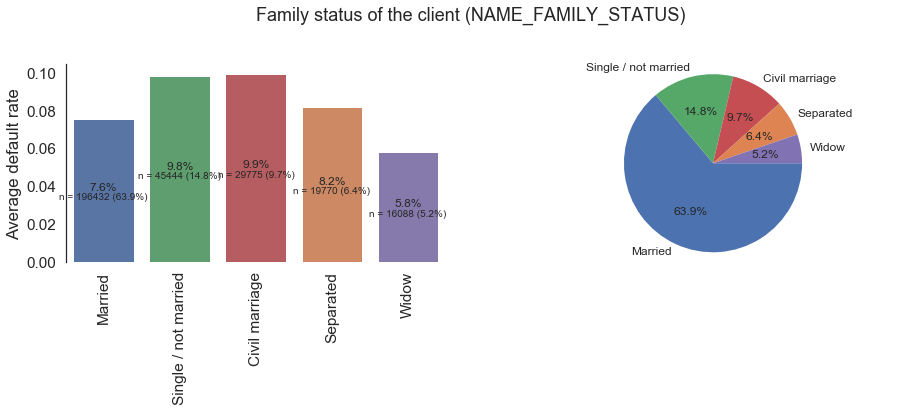

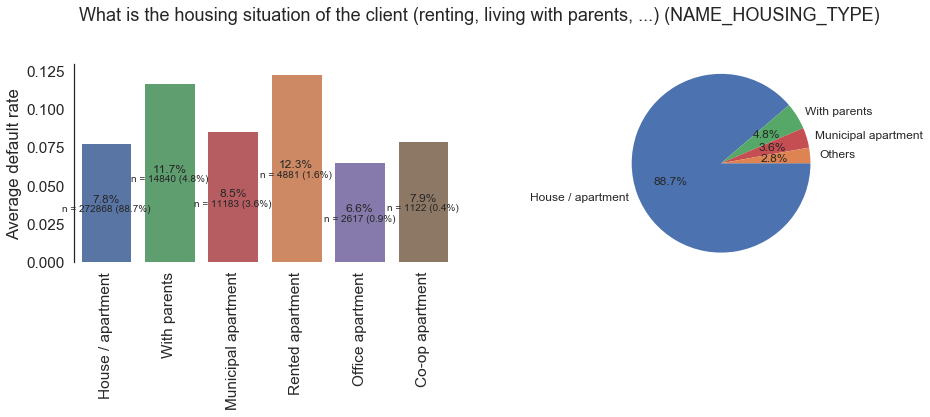

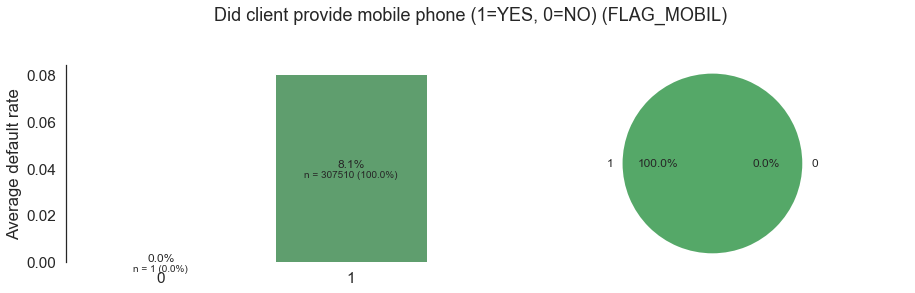

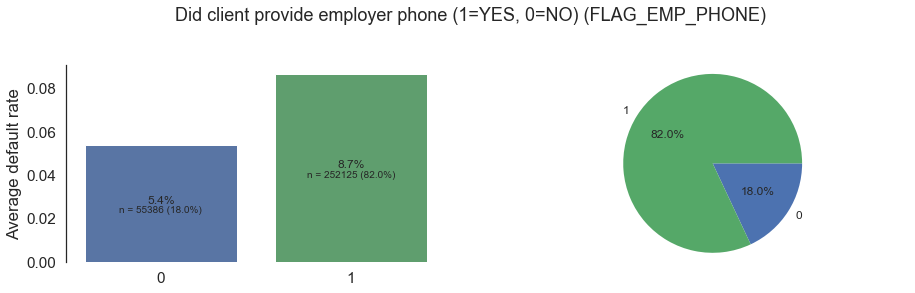

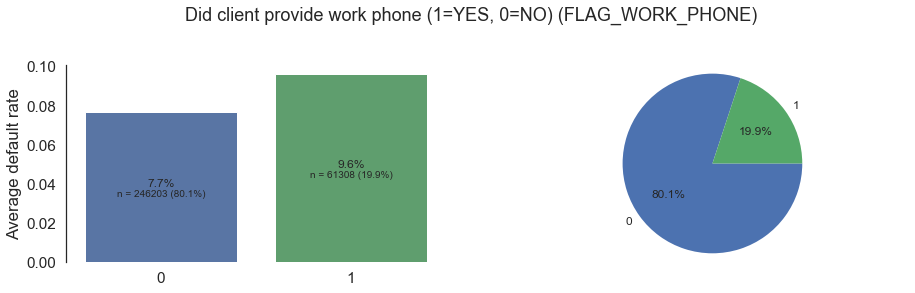

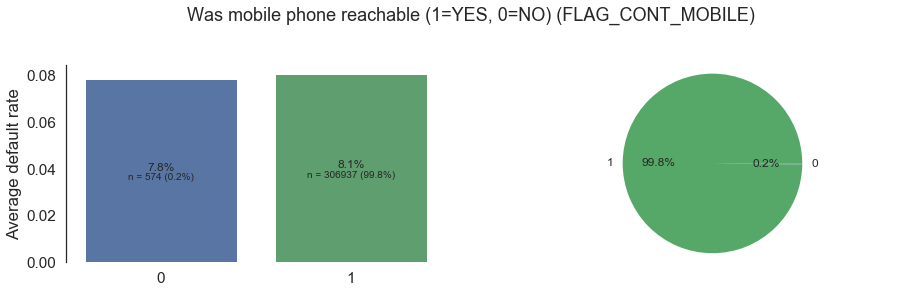

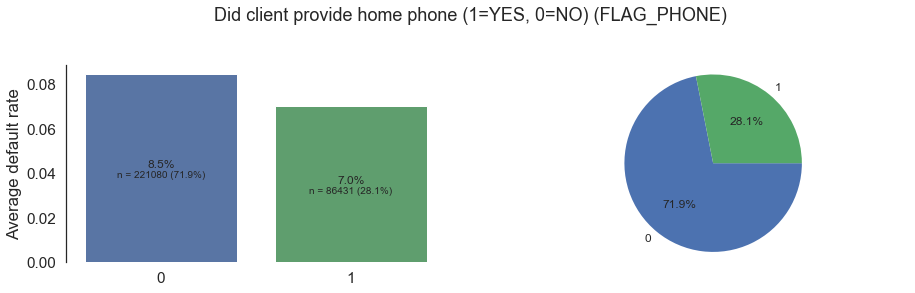

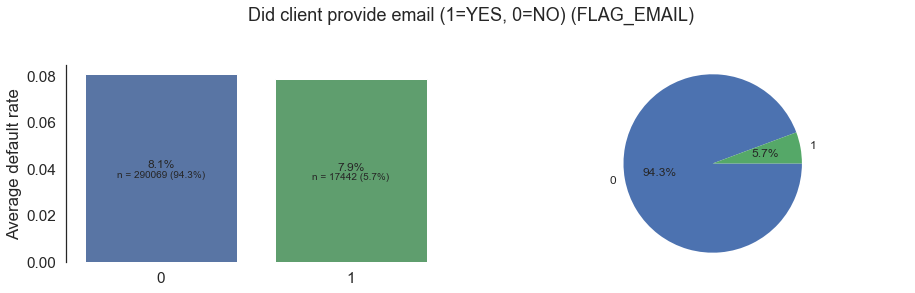

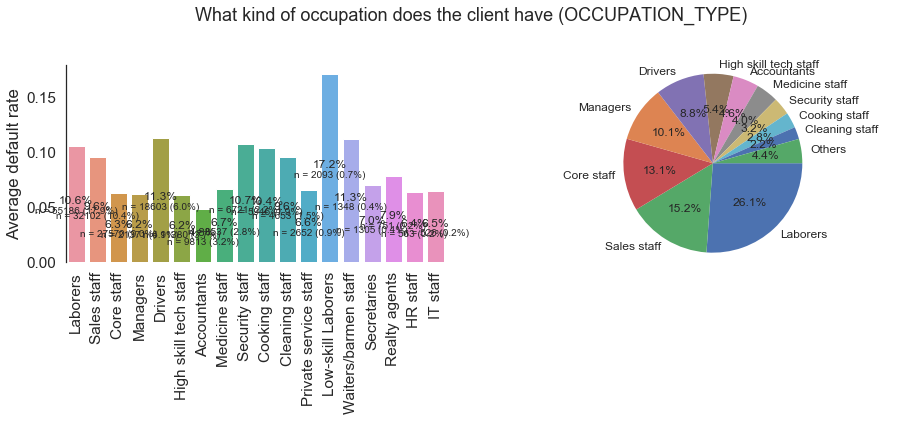

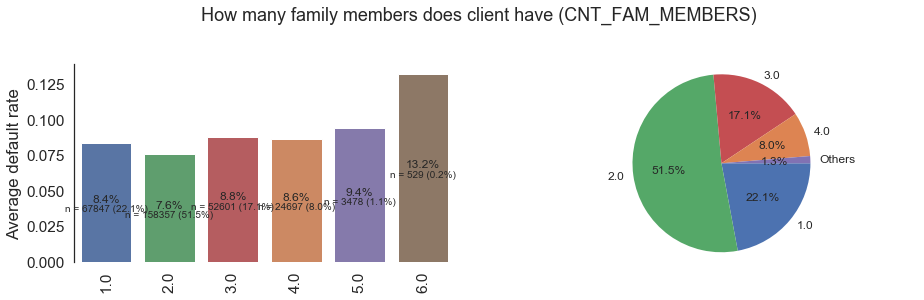

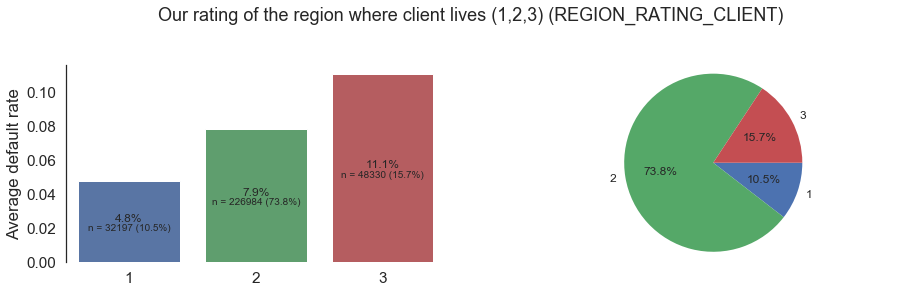

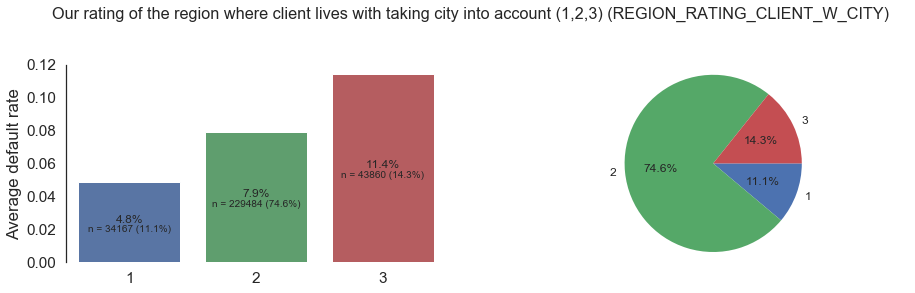

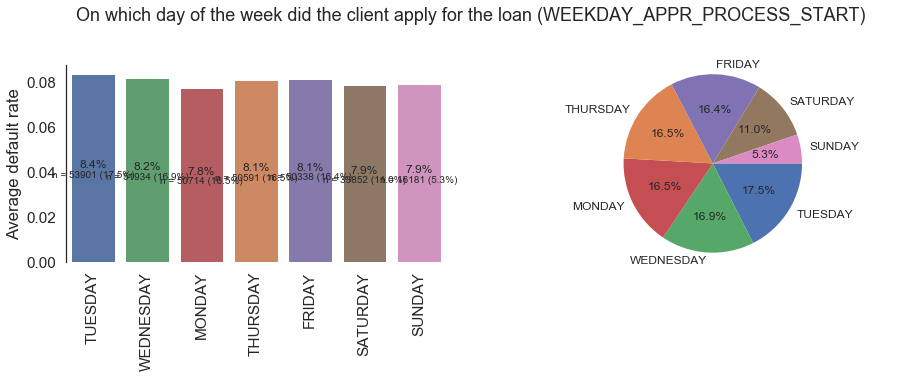

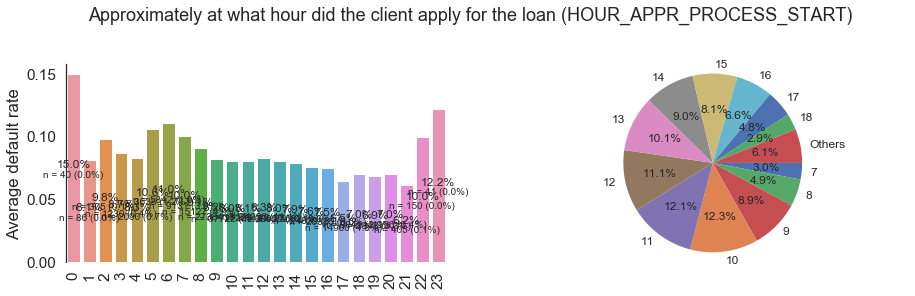

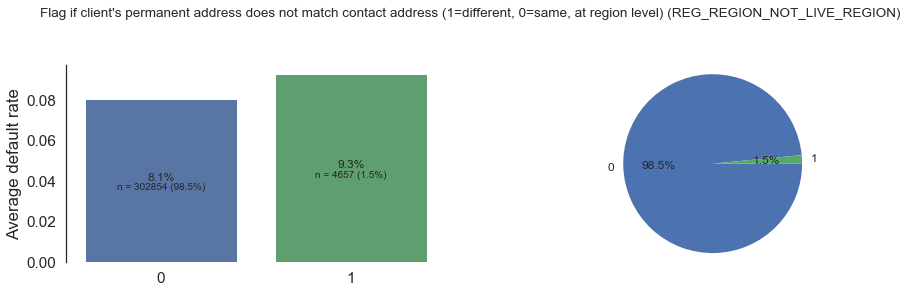

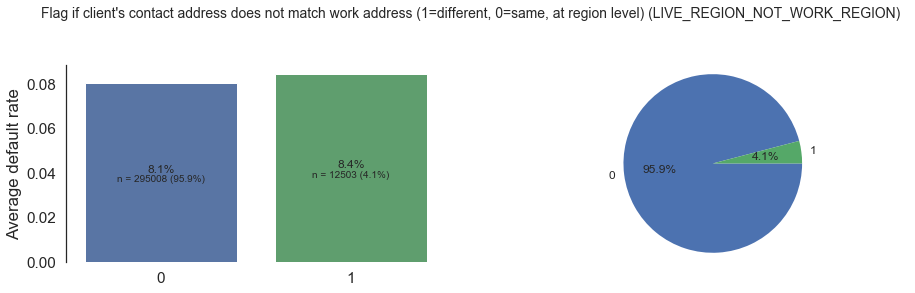

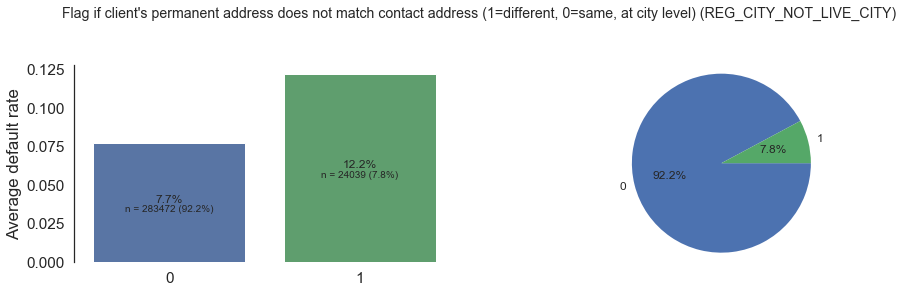

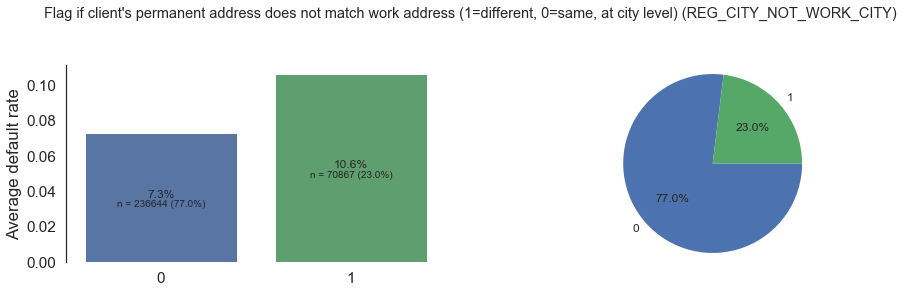

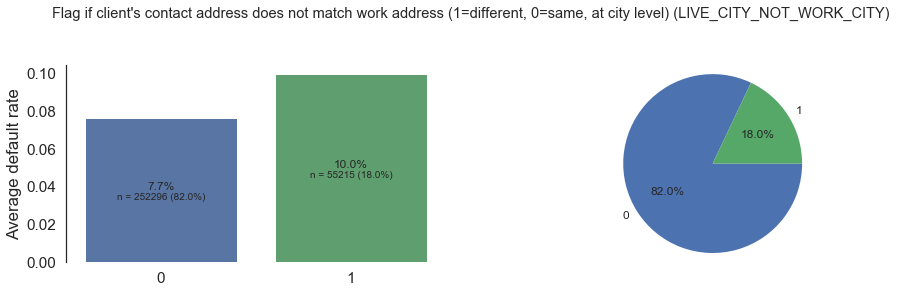

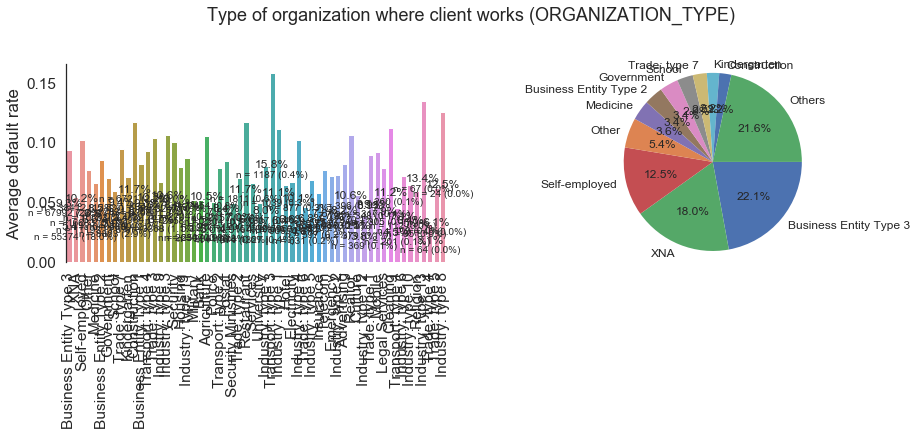

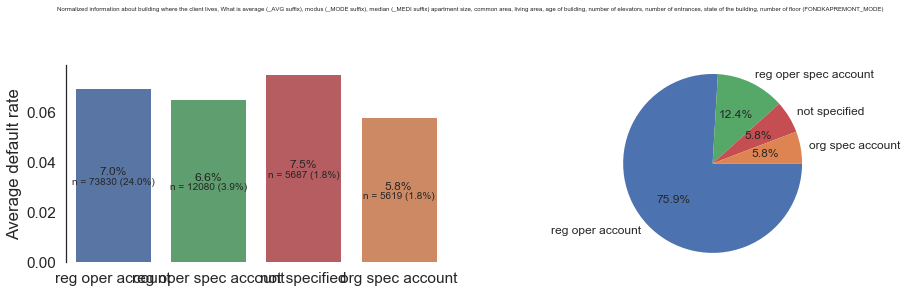

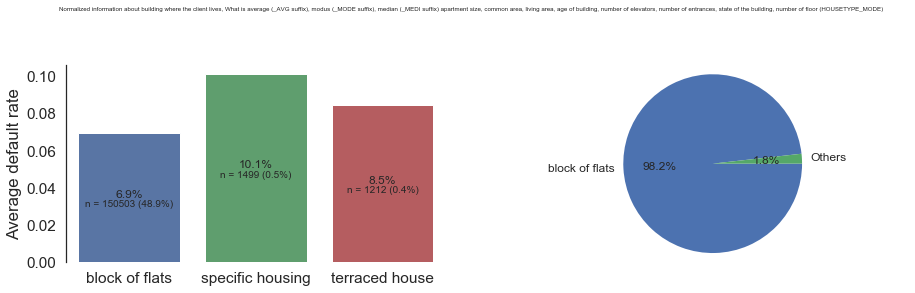

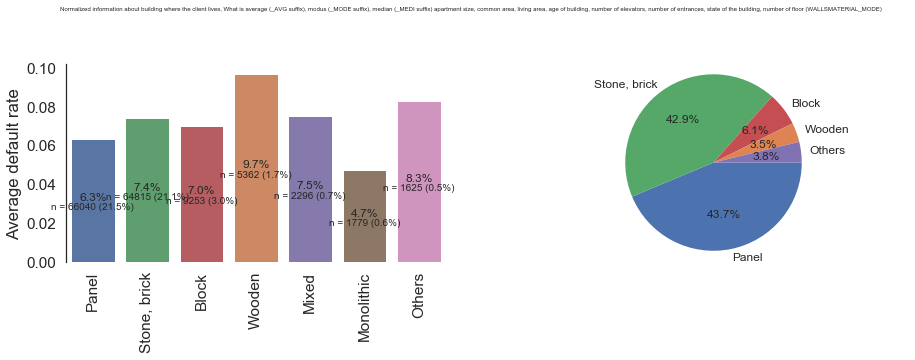

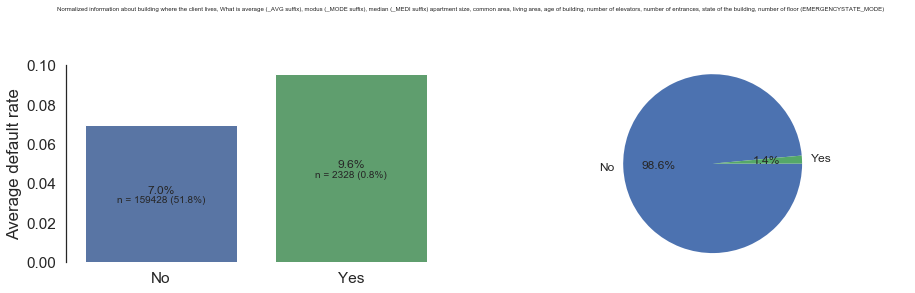

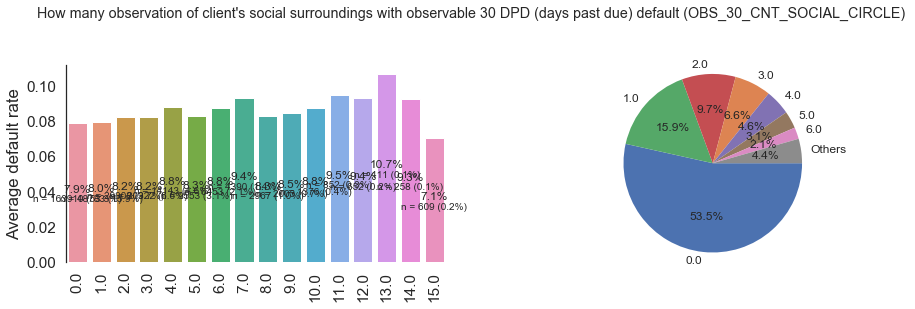

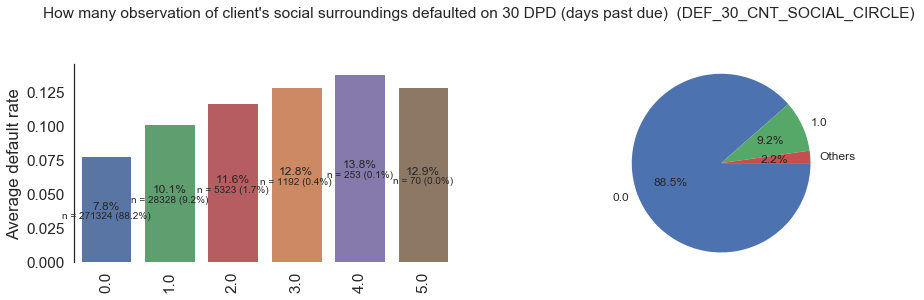

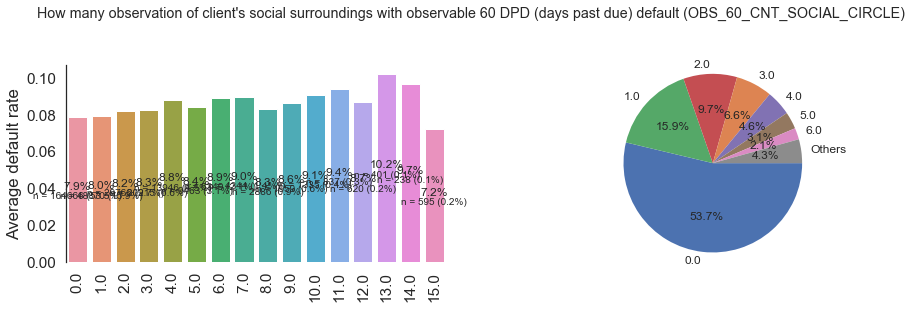

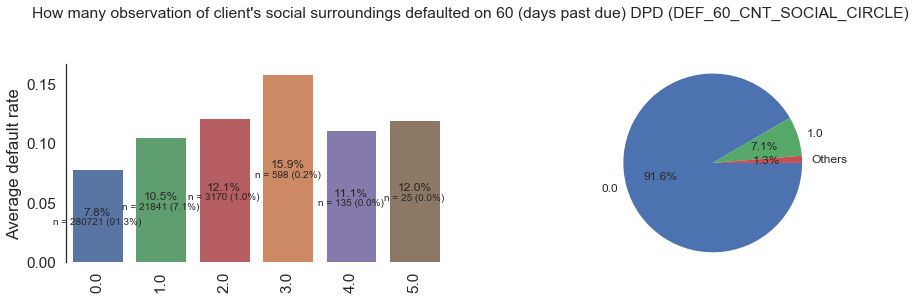

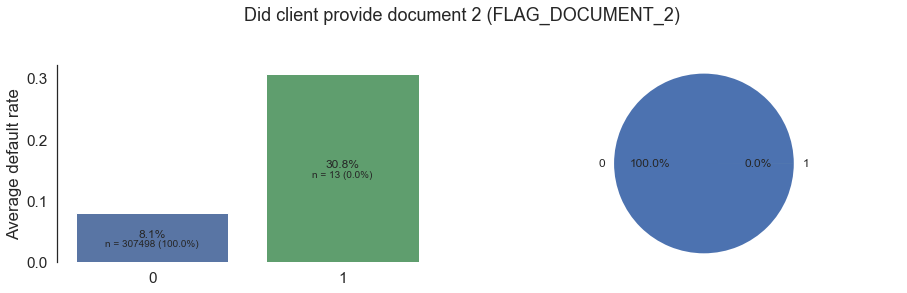

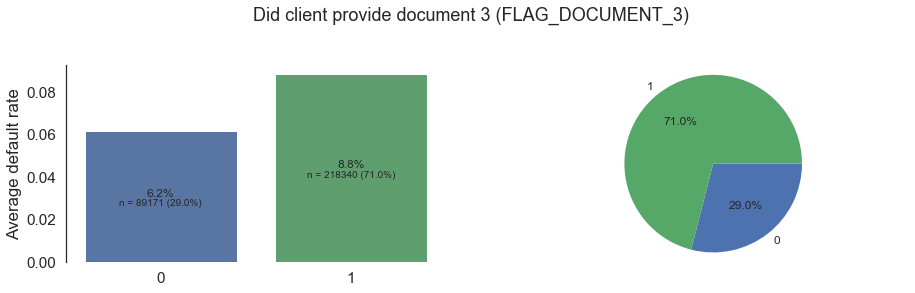

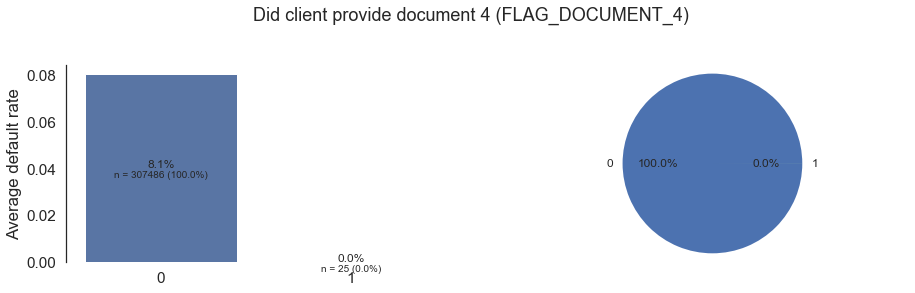

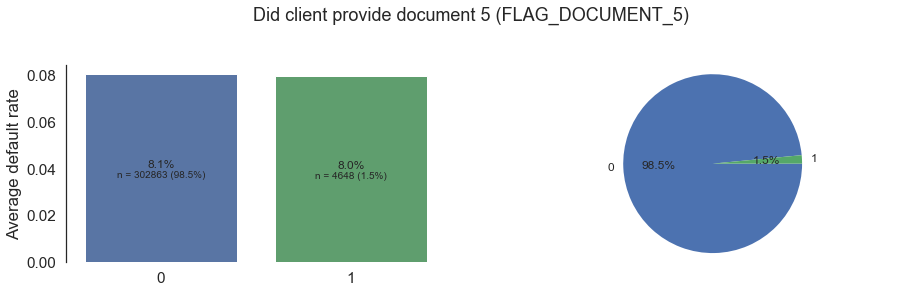

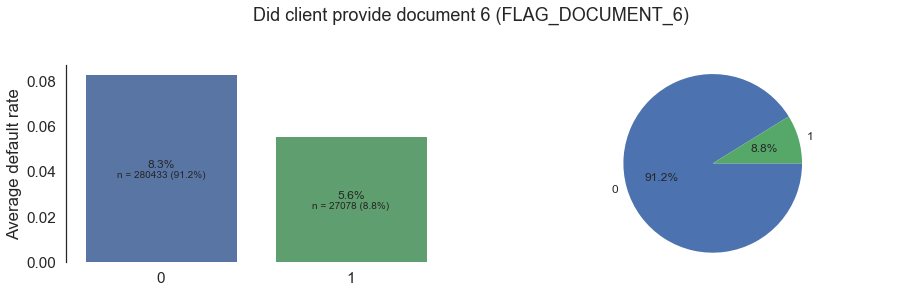

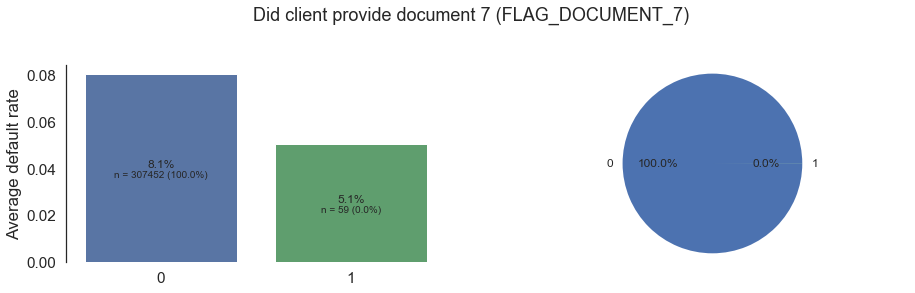

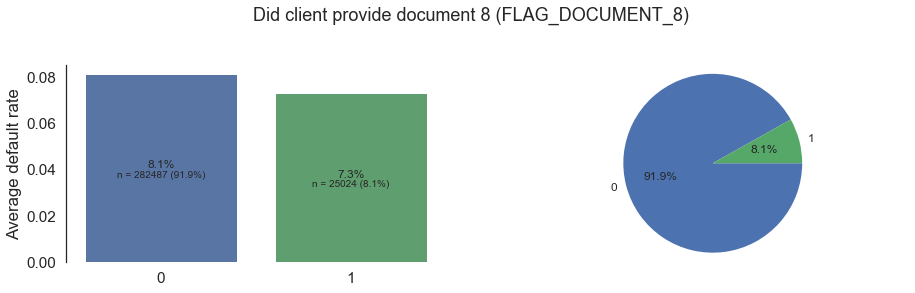

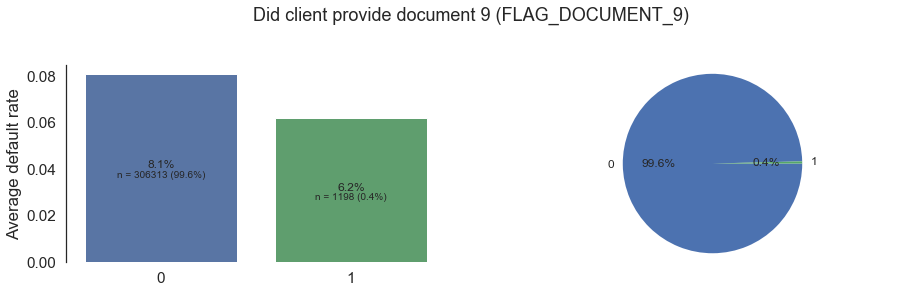

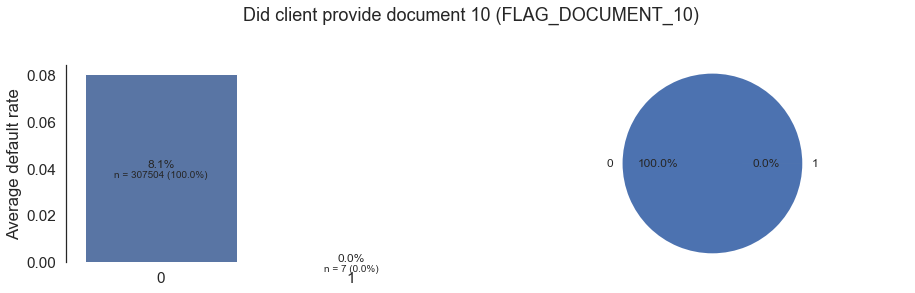

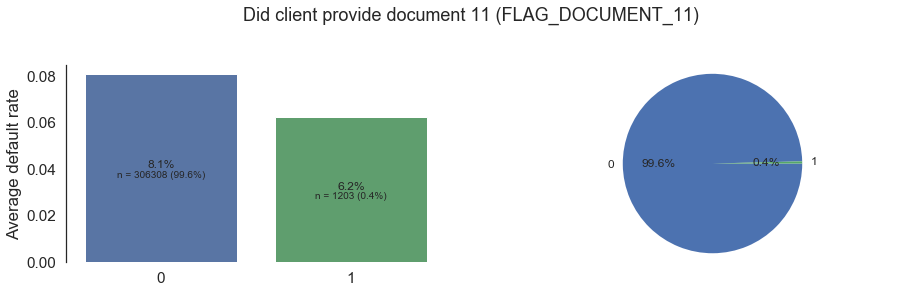

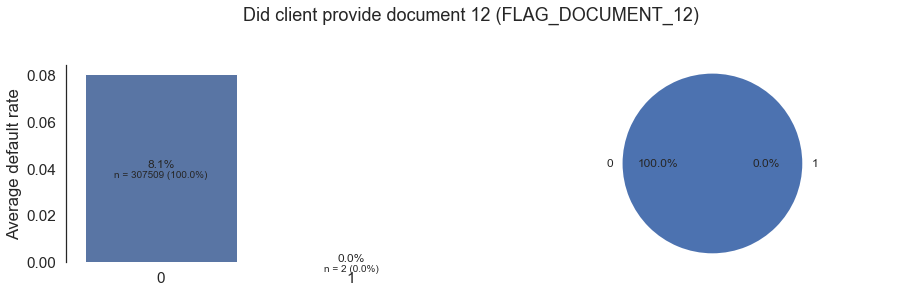

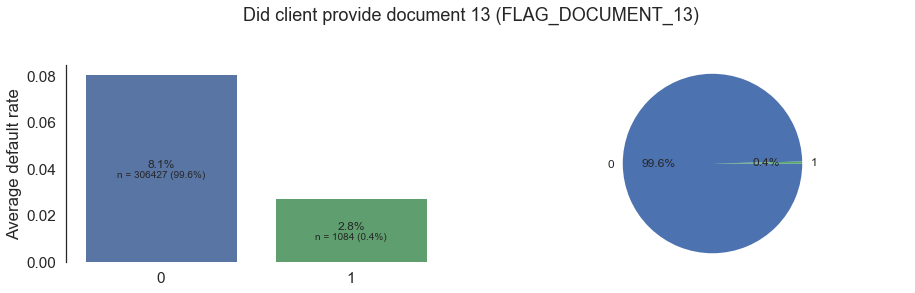

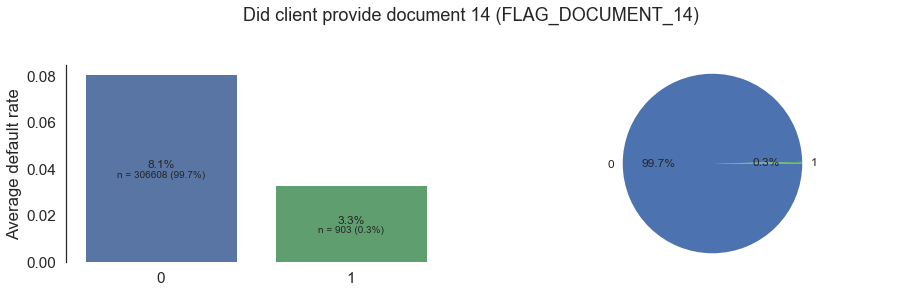

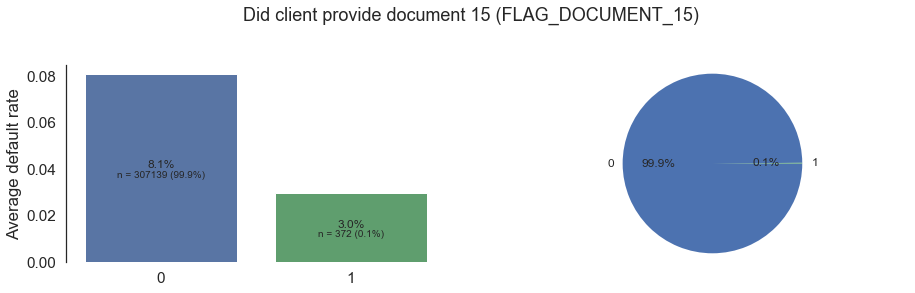

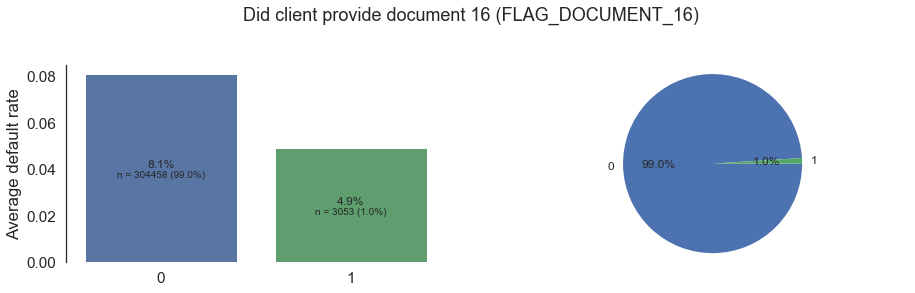

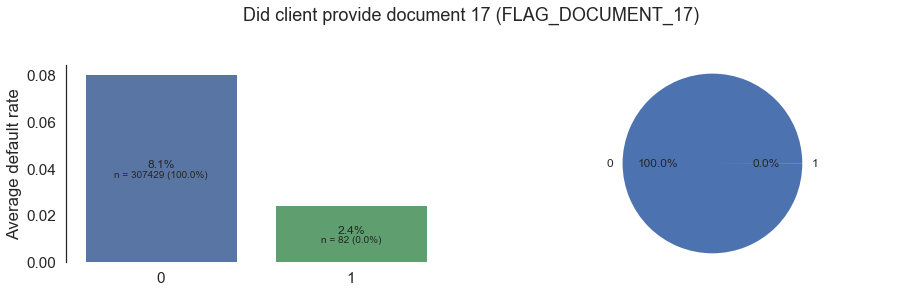

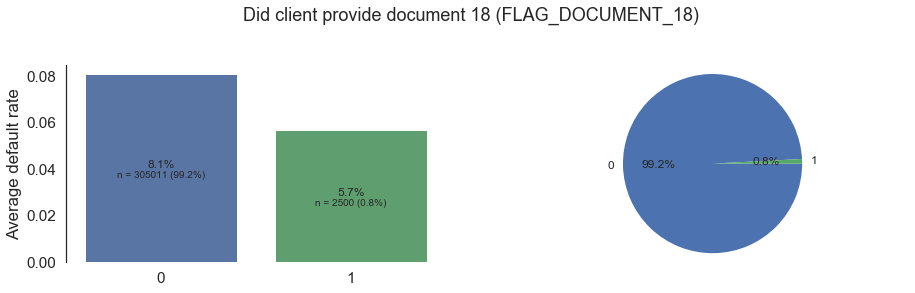

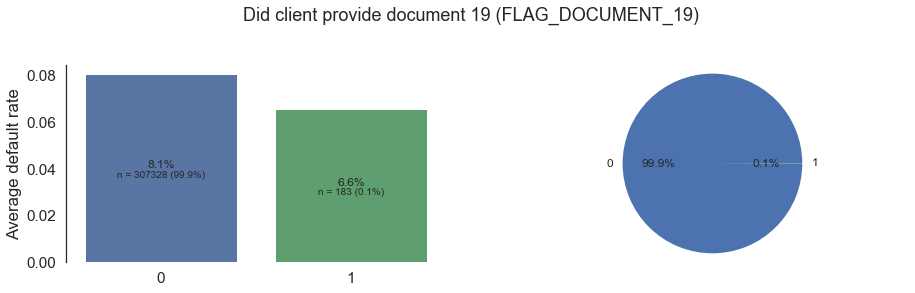

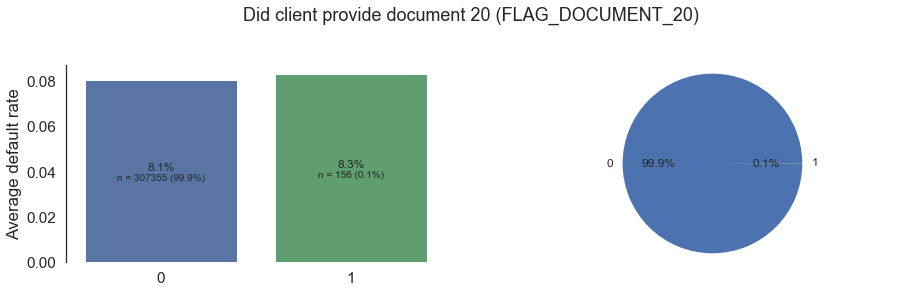

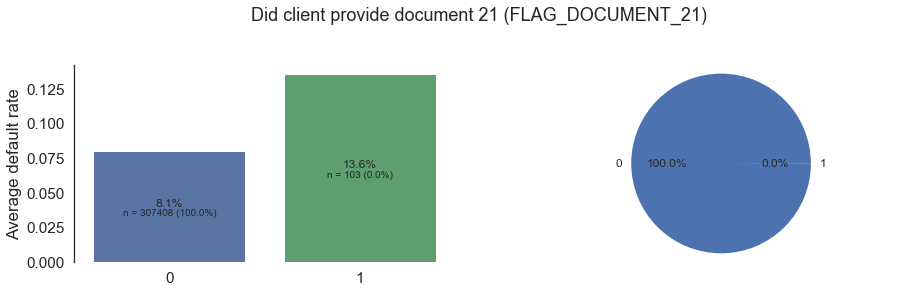

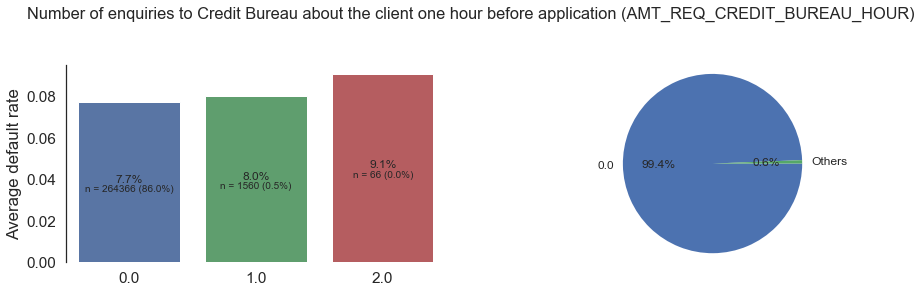

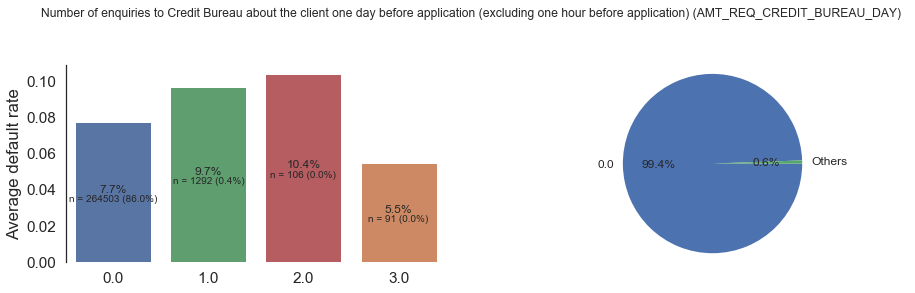

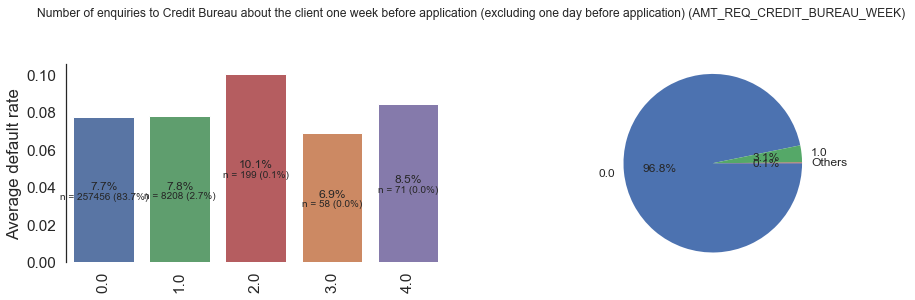

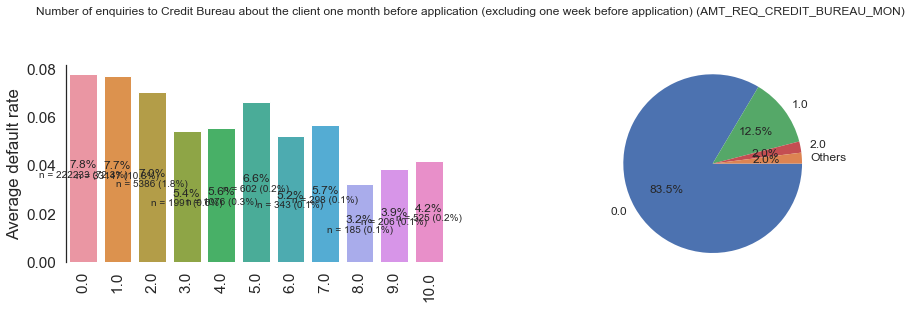

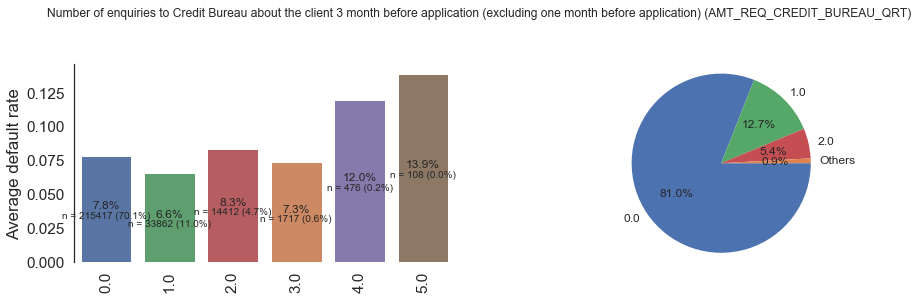

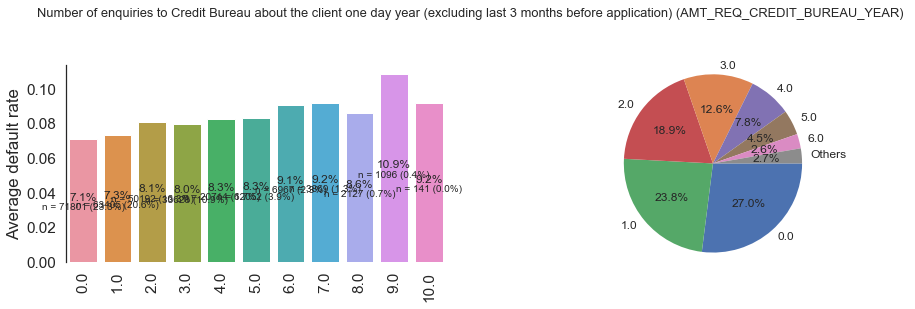

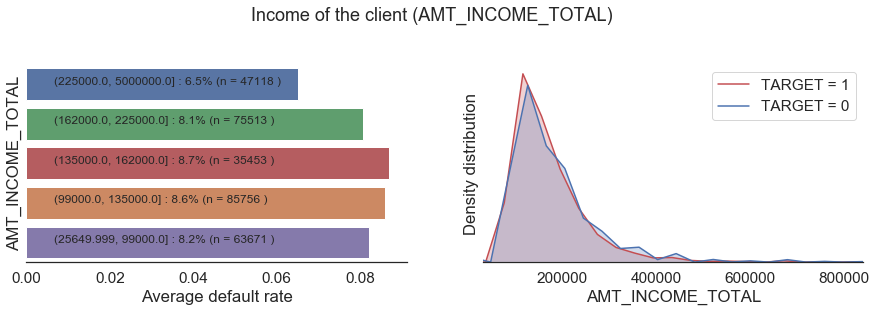

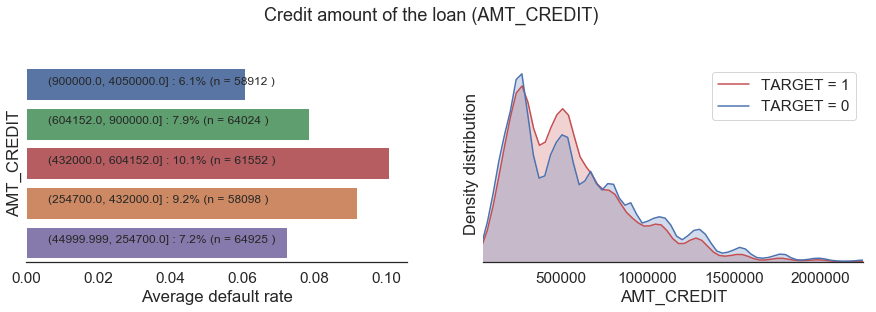

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


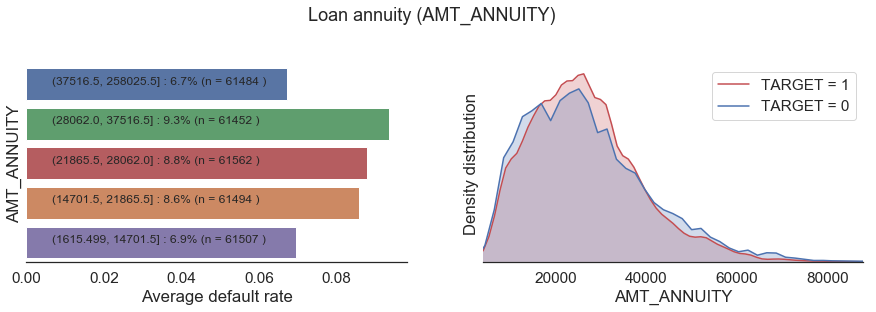

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


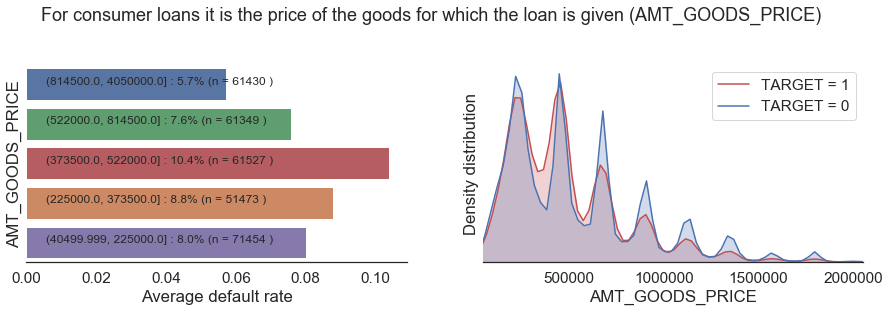

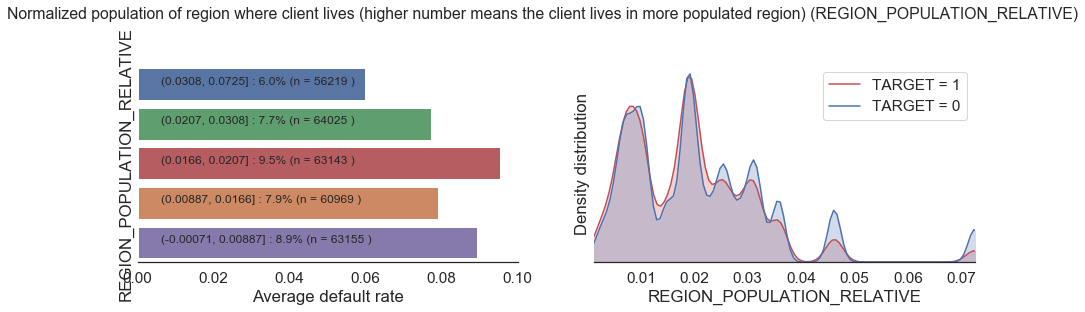

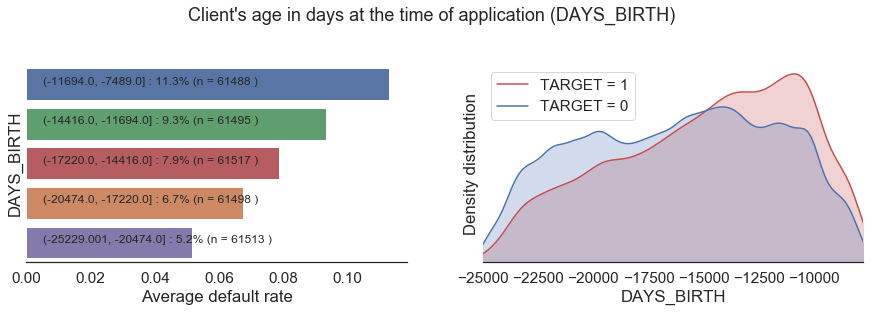

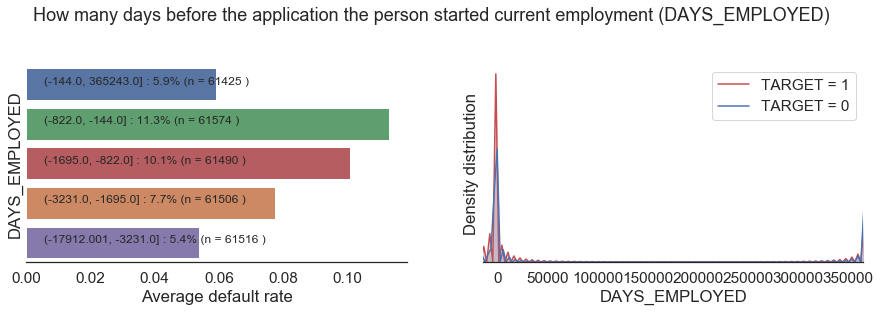

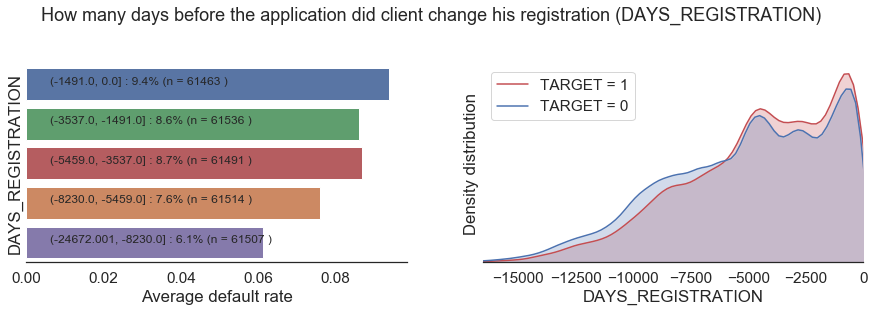

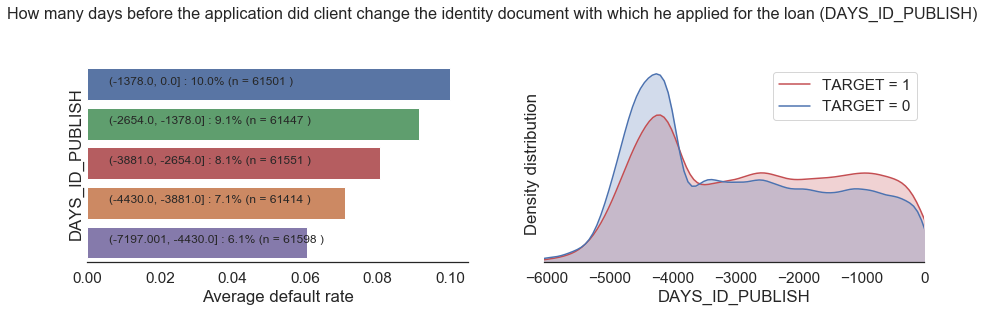

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


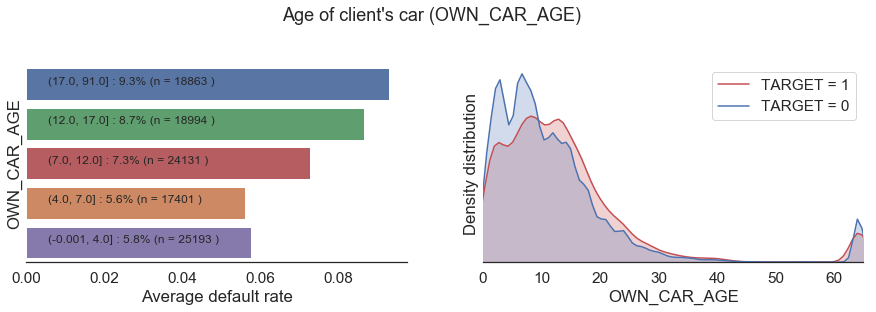

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


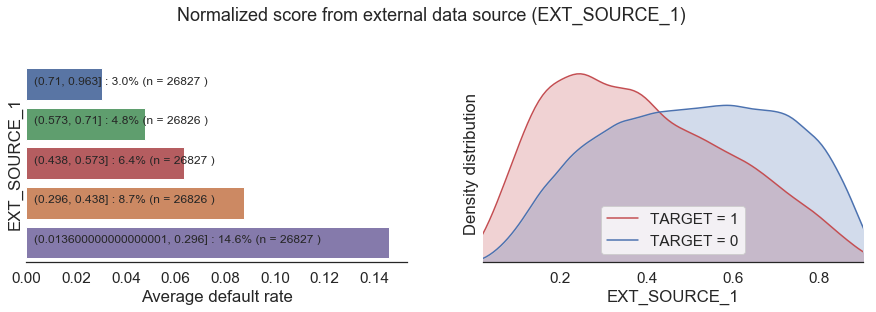

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


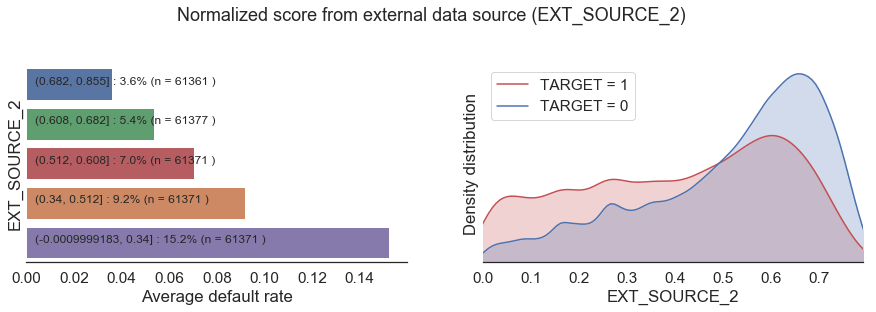

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


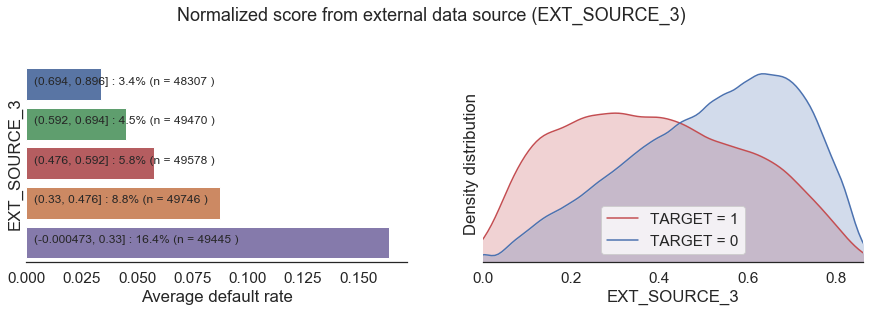

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


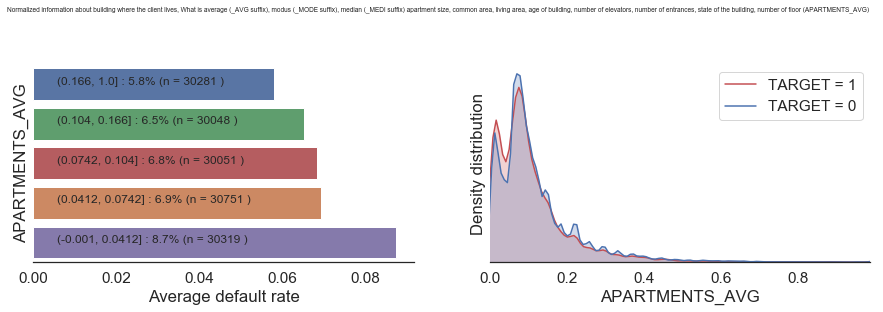

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


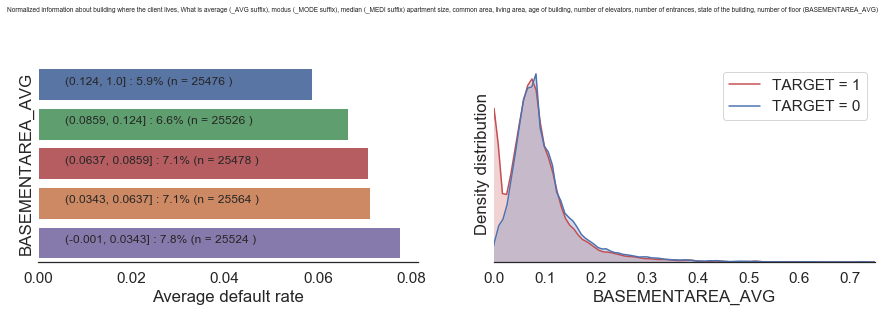

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


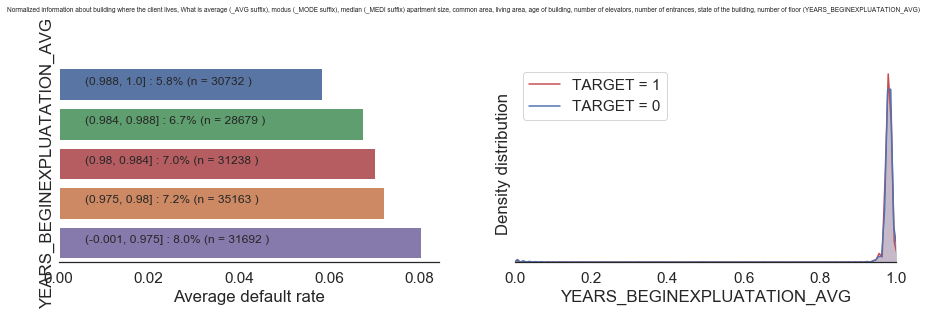

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


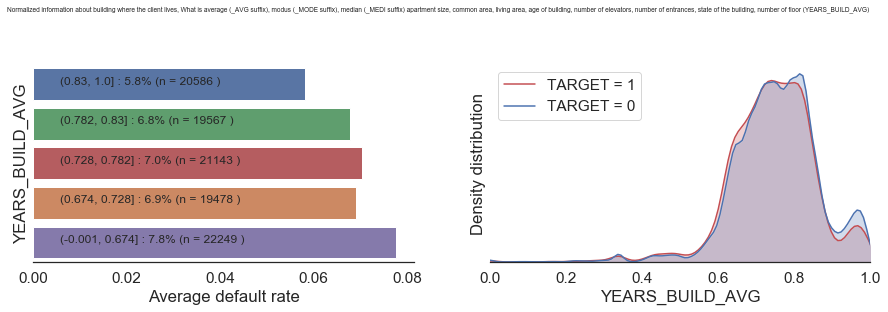

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


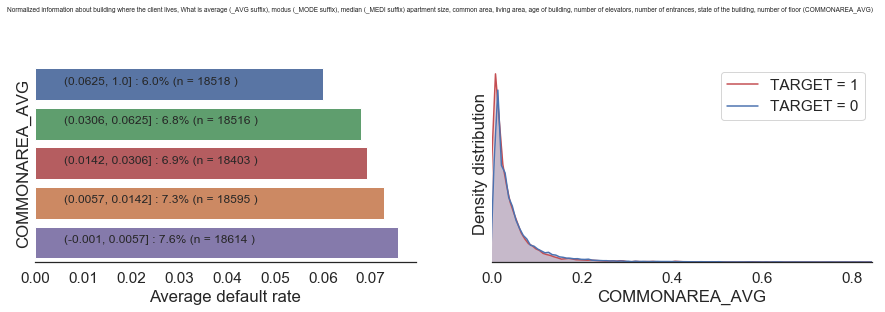

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


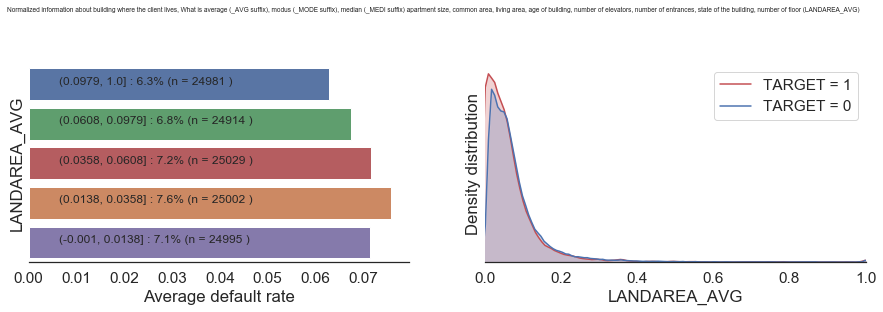

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


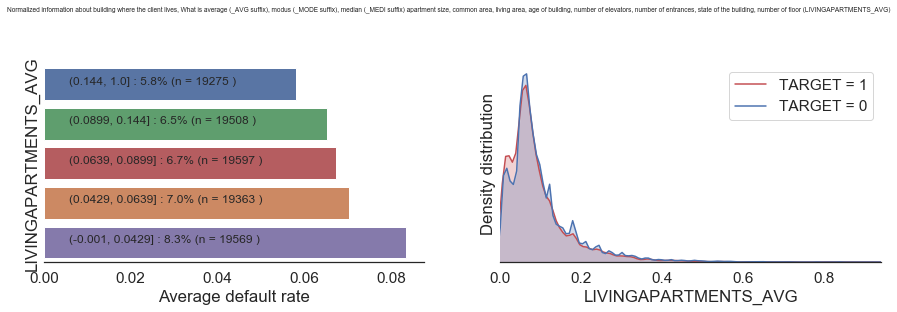

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


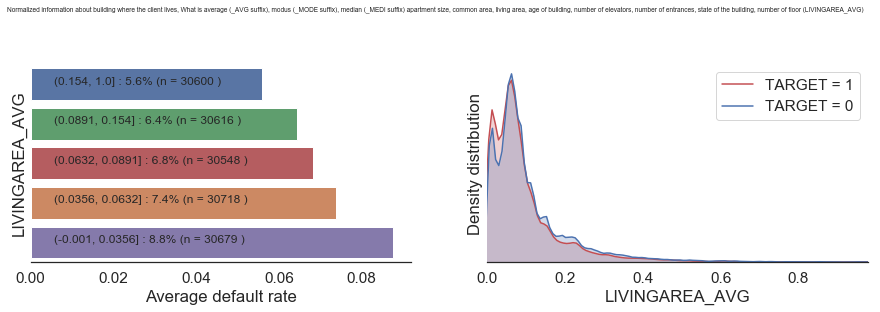

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


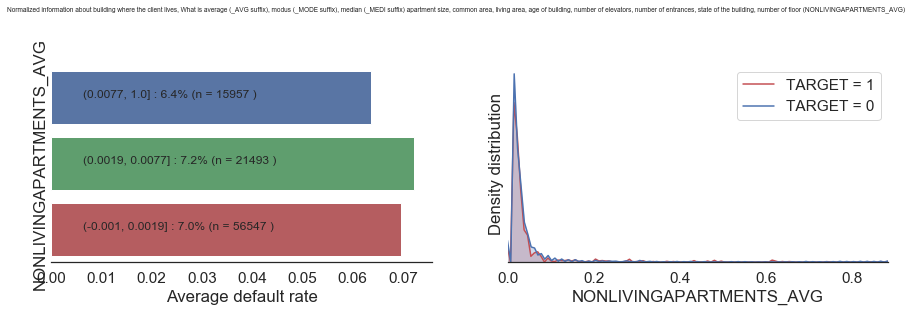

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


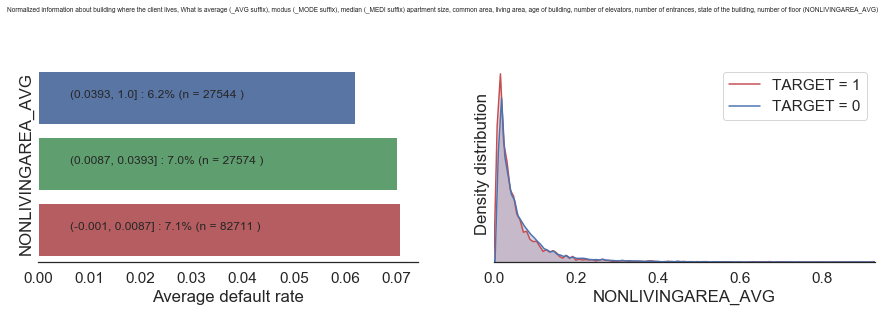

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


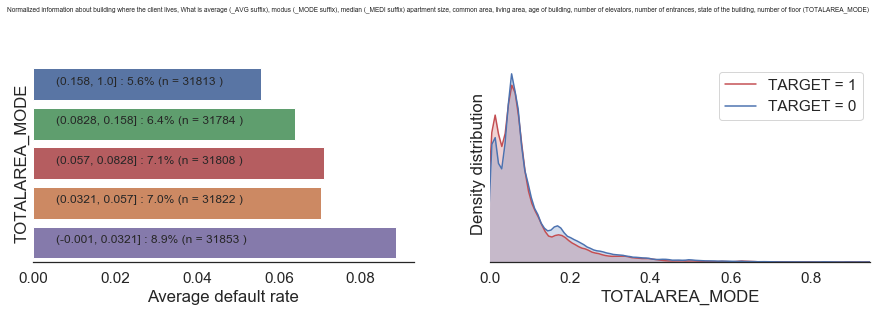

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


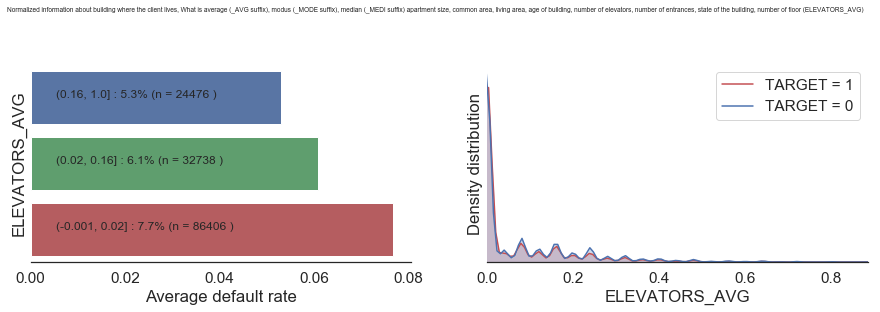

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


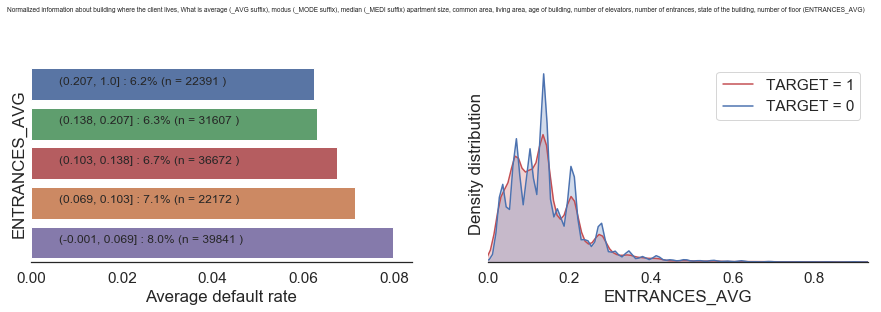

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


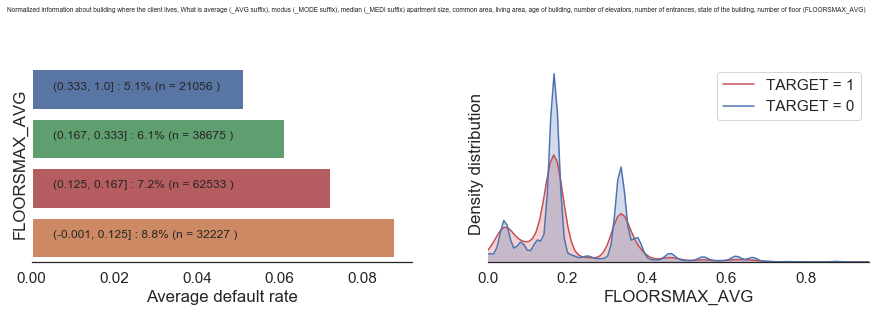

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


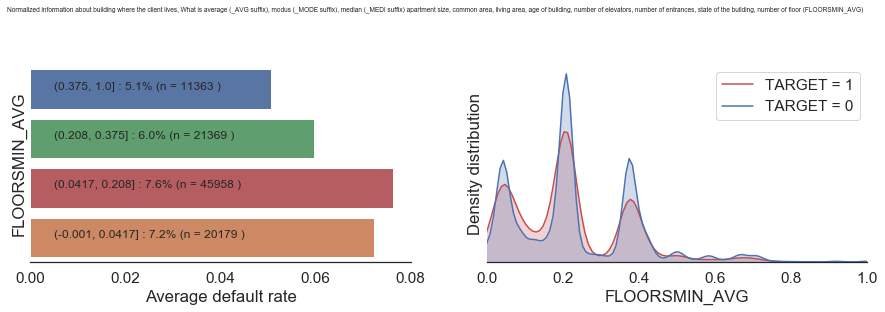

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


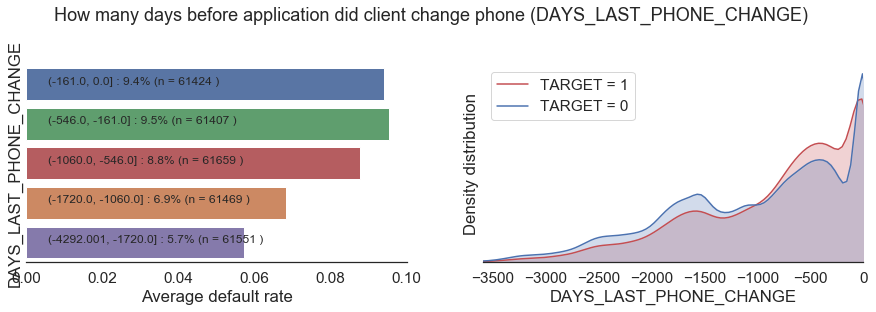

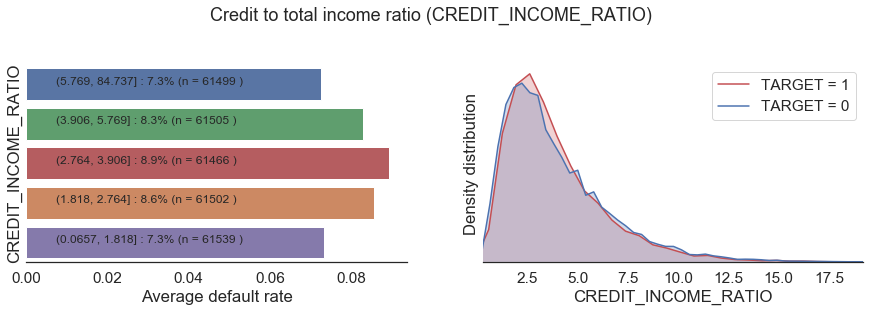

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


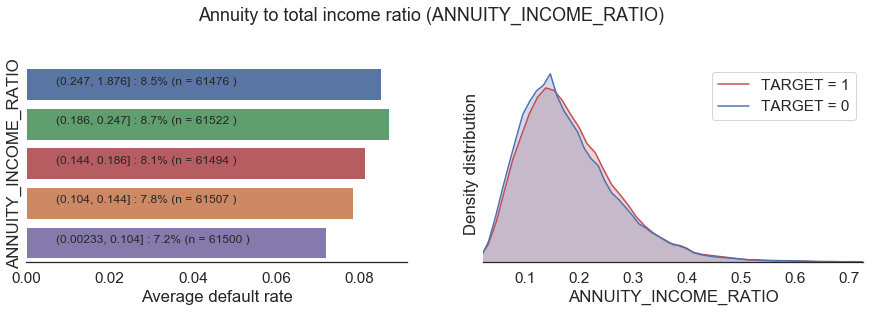

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


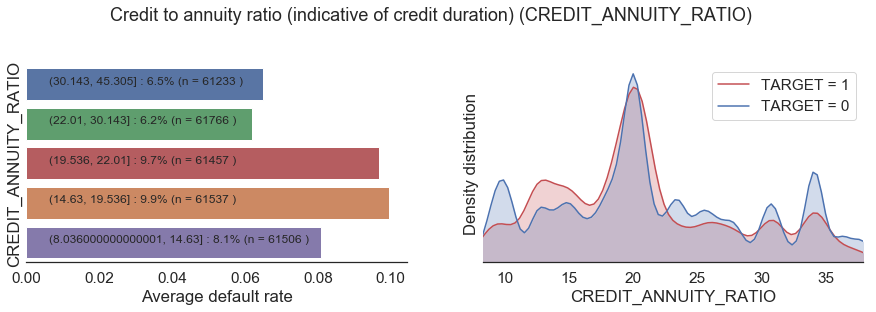

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


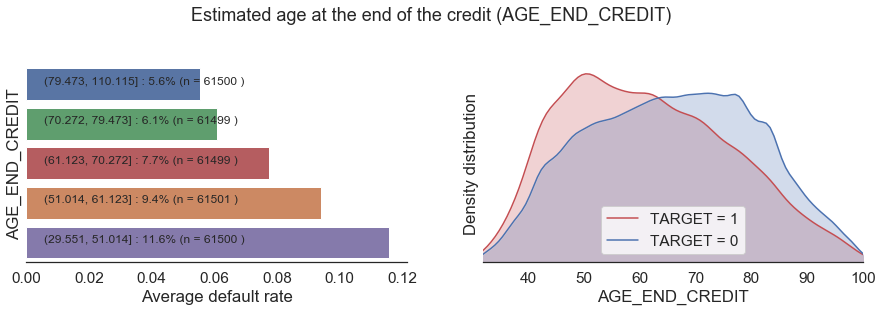

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


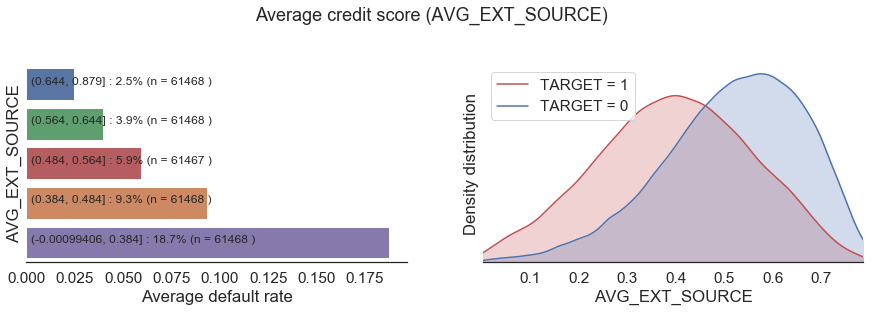

In [13]:
def display_discrete_feature(df, feature, target):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0] + " (" + feature + ")"
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title, size = 18)
    else:
        plt.suptitle(title, size = 18*100/len(title))
    
    # Bar plot of mean target as a function of feature value
    df_grouped = df[[feature, target]].groupby([feature]).agg(["mean", "count"])
    # In case of non numerical categorial data, sort by value count
    if type(df_grouped.index[0]) == str:
        df_grouped = df_grouped.sort_values(by = [("TARGET", "count")], ascending = False)
    index = df_grouped.index
    height = df_grouped[("TARGET", "mean")].tolist()
    count = df_grouped[("TARGET", "count")].tolist()
    sns.barplot(index, height, ax = ax1)
    if len(count) >= 5:
        ax1.tick_params(axis='x', rotation=90, labelleft = True)
    ax1.set_xlabel("")
    ax1.set_ylabel('Average default rate')

    sns.despine(bottom=True, ax = ax1)
    # Writing target average and count for each bar plot
    for i, item in enumerate(count):
        ax1.text(x = i , y = height[i]/2, s = str(round(height[i]*100,1))+"%", size = 12, horizontalalignment='center')
        ax1.text(x = i , y = height[i]/2-np.max(height)/20, s = "n = "+str(item)+" ("+str(round(item/len(df)*100, 1))+"%)", size = 10, horizontalalignment='center')

    # Pie chart for the selected feature
    df_value_count = df[feature].value_counts()/len(df[feature].dropna())
    # In case of numerical categorial data, sort by index
    if type(df_value_count.index[0]) != str:
        df_value_count = df_value_count.sort_index()
    # If there are more than 2 categories with low count, then group in Others category
    if len(df_value_count[df_value_count < 2/100]) >= 2:
        df_value_count = df_value_count[df_value_count > 2/100]
        df_value_count["Others"] = 1 - df_value_count.sum()
    df_value_count.plot(kind="pie", autopct="%1.1f%%", ax = ax2, startangle = 0
                        , counterclock = False, textprops=dict(fontsize=12), 
                       wedgeprops = {'linewidth': 0} )
    ax2.set_ylabel("")
    ax2.axis('equal')

    plt.show()
    
    
def display_continuous_feature(df, feature, target, bins):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
   
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0]
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title+ " (" + feature + ")", size = 18)
    else:
        plt.suptitle(title+ " (" + feature + ")", size = 18*100/len(title))

    # Barplot of mean target as a function of feature value
    feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    while len(feature_bins.unique()) <= 2:
        bins = bins * 5
        feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    df2 = df.pivot_table(target, feature_bins).reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    df3 = df.pivot_table(target, feature_bins, aggfunc='count').reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    sns.barplot(y=feature, x=target, orient = "h", data = df2, ax = ax1, order = df2[feature])
    height = df2[target]
    count =  df3[target]
    ax1.set_ylabel(feature)
    ax1.set_xlabel('Average default rate')
    ax1.set_yticks([])
    for i, item in enumerate(count):
        ax1.text(y = i , x = min(height)/10, s = str(df2[feature][i]) + " : "+ str(round(height[i]*100,1))+"%" +" (n = "+str(item)+" )", size = 12, horizontalalignment='left')
    sns.despine(left=True, ax = ax1)

    # Kernel Density Estimate of the feature for both target values
    sns.kdeplot(df[df["TARGET"] == 1][feature], shade=True, color = pal.as_hex()[2], ax = ax2, label="TARGET = 1")
    sns.kdeplot(df[df["TARGET"] == 0][feature], shade=True, color = pal.as_hex()[0], ax = ax2, label="TARGET = 0")
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Density distribution')
    ax2.set_yticks([])
    min_x = min(df[df["TARGET"] == 1][feature].quantile(.001), df[df["TARGET"] == 0][feature].quantile(.001))
    max_x = min(df[df["TARGET"] == 1][feature].quantile(.999), df[df["TARGET"] == 0][feature].quantile(.999))
    ax2.set_xlim([min_x, max_x])
    sns.despine(left=True, ax = ax2)
    plt.show()

for feature in discrete_features:
    display_discrete_feature(application[application["train"] == 1], feature, "TARGET")

for index, feature in enumerate(continuous_features):
    display_continuous_feature(application[application["train"] == 1], feature, "TARGET", 5)

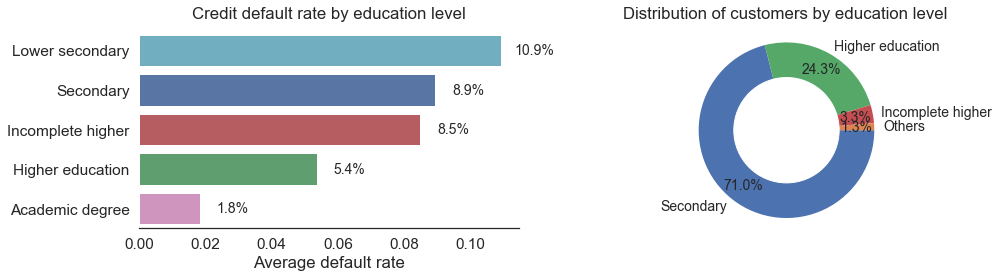

In [135]:
display_discrete_feature(application[application["train"] == 1], "NAME_EDUCATION_TYPE", "TARGET")